# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle, polygon_perimeter
from skimage.filters import threshold_mean,threshold_otsu

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

0.5957045902267157


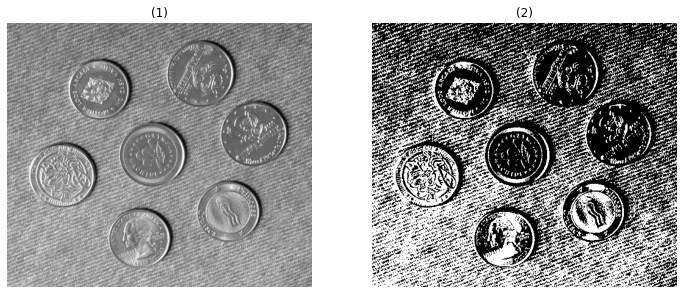

In [2]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
img = rgb2gray(io.imread('img/coins.jpg'))
thresh = threshold_otsu(img)
print(thresh)
#binaryImg[img <= thresh] = 0
#binaryImg[img > thresh] = 1
binaryImg = img > thresh
binaryImg = binaryImg.astype(np.uint8) * 255
show_images([img,binaryImg])
#io.imshow(binaryImg)

In [3]:
def dilation(img,se = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0],
])):
    #dilatedImg = binary_dilation(img,se)
    dilatedImg = binary_dilation(img,se)
    dilatedImg = dilatedImg.astype(np.uint8) * 255
    return dilatedImg

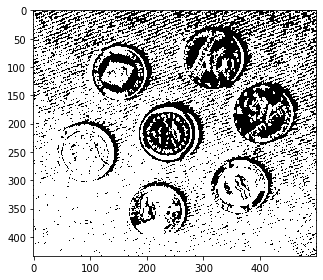

In [4]:
io.imshow(dilation(binaryImg))

In [5]:
def erosion(img,se = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0],
])):
    #dilatedImg = binary_erosion(img,se)
    erosedImg = binary_erosion(img,se)
    erosedImg = erosedImg.astype(np.uint8) * 255
    return erosedImg

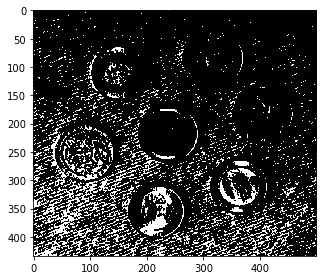

In [6]:
io.imshow(erosion(binaryImg))

In [7]:
def erode_loop(img ,se = np.array([[0,1,0],[1,1,1],[0,1,0],])):
    height = int(se.shape[0]/2)
    width = int(se.shape[1]/2)
    m = img.shape[0]
    n = img.shape[1]
    targetedSum = np.sum(se)
    newImg = np.zeros(img.shape)
    print(height,width,m,n,targetedSum)
    for x in range(height,m-height):
        for y in range(width,n-width):
            window = img[x-height:x+height+1,y-width:y+width+1]
            result = np.multiply(window,se)
            sum = np.sum(result)
            if(sum >= targetedSum*255):
                newImg[x][y] = 1
            else:
                newImg[x][y] = 0
    return newImg
    

1 1 434 500 5


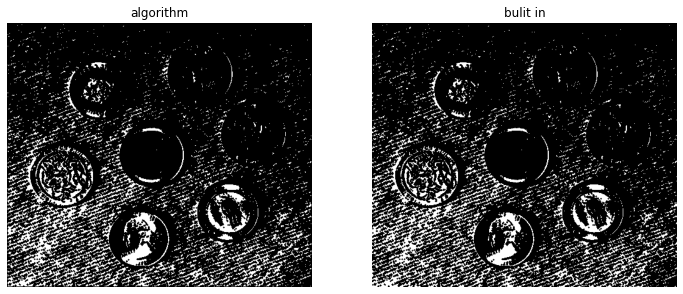

In [8]:
show_images([erode_loop(binaryImg),erosion(binaryImg)],["algorithm","bulit in"])

In [9]:
def dilate_loop(img ,se = np.array([[0,1,0],[1,1,1],[0,1,0],])):
    height = int(se.shape[0]/2)
    width = int(se.shape[1]/2)
    m = img.shape[0]
    n = img.shape[1]
    newImg = np.zeros(img.shape)
    print(height,width,m,n)
    for x in range(height,m-height):
        for y in range(width,n-width):
            window = img[x-height:x+height+1,y-width:y+width+1]
            result = np.multiply(window,se)
            sum = np.sum(result)
            if(sum > 0):
                newImg[x][y] = 1
            else:
                newImg[x][y] = 0
    return newImg
    

1 1 434 500


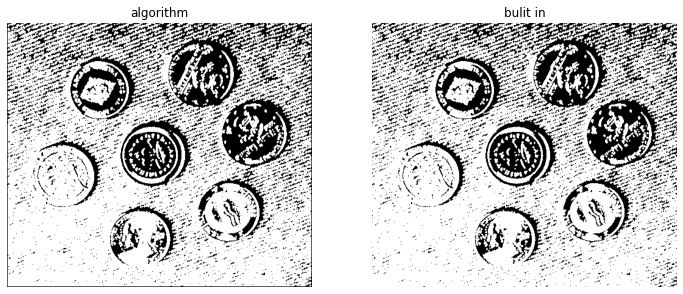

In [10]:
show_images([dilate_loop(binaryImg),dilation(binaryImg)],["algorithm","bulit in"])

In [11]:
# '''
# 2) Case Study: Credit Card Number Extraction
#     - Load "card.jpg" from the img folder
#     - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
#     - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
#         Note: The goal of this step is to join the card number into 4 sets of connected pixels
#     - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
#         Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
#                 - contour[:,0] being the Y values of the contour perimeter points
#                 - contour[:,1] being the X values of the contour perimeter points
# '''

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
# for box in bounding_boxes:
#     [Xmin, Xmax, Ymin, Ymax] = box
#     rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
#     img_with_boxes[rr, cc] = 1 #set color white

0.6815237936580881


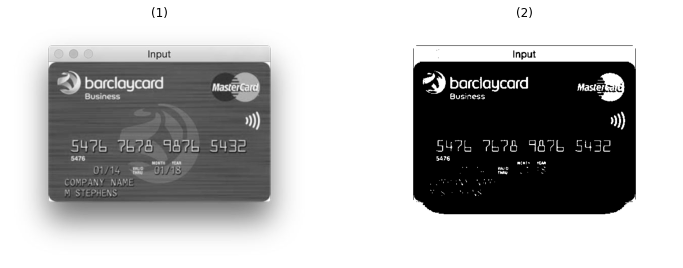

In [12]:
img = rgb2gray(io.imread('img/card.jpg'))
thresh = threshold_otsu(img)
print(thresh)
binaryImg = img > thresh
#binaryImg = img > 0.5
binaryImg = binaryImg.astype(np.uint8) * 255
show_images([img,binaryImg])

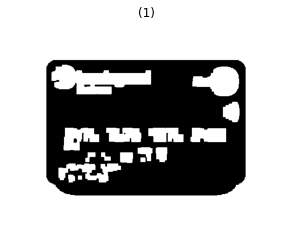

In [13]:
# dilatedImg = dilation(binaryImg)
# erosedImg = erosion(dilatedImg) 
# SE = np.array([
#     [1,1,1,1,1],
#     [1,1,1,1,1],
#     [1,1,1,1,1],
#     [1,1,1,1,1],
#     [1,1,1,1,1]
# ])
SE = np.ones((11,11))
# SE2 = np.ones((3,3))
# erosedImg = binary_closing(binaryImg,SE)
dilatedImg = dilation(binaryImg,SE)
erosedImg = erosion(dilatedImg)
# erosedImg = dilatedImg
show_images([erosedImg])

In [14]:
contours = find_contours(erosedImg,0.8)
# print(bounding_boxes)
bounding_boxes = []

for contour in contours:
    Xmin = int(np.min(contour[:,1]))
    Xmax = int(np.max(contour[:,1]))
    Ymin = int(np.min(contour[:,0]))
    Ymax = int(np.max(contour[:,0]))
    if( 1.5<=(Xmax-Xmin)/(Ymax-Ymin) <= 2.5):
        bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
img_with_boxes  = np.copy(img)
print(len(bounding_boxes))
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax),shape=img_with_boxes.shape)
#     rr = rr.astype(np.uint8)
#     cc= cc.astype(np.uint8)
#     r = [box[0],box[1],box[1],box[0], box[0]]
#     c = [box[3],box[3],box[2],box[2], box[3]]
#     rr, cc = polygon_perimeter(r, c, img_with_boxes.shape)
    img_with_boxes[rr, cc] = 1 #set color white


5


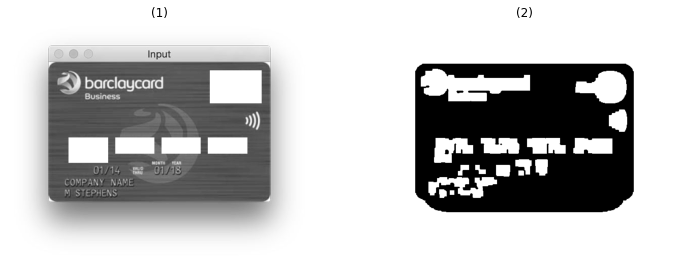

In [15]:
show_images([img_with_boxes,erosedImg])

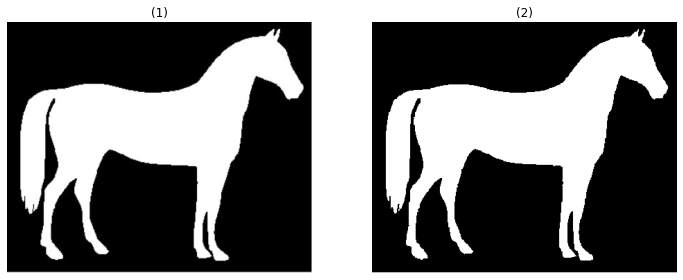

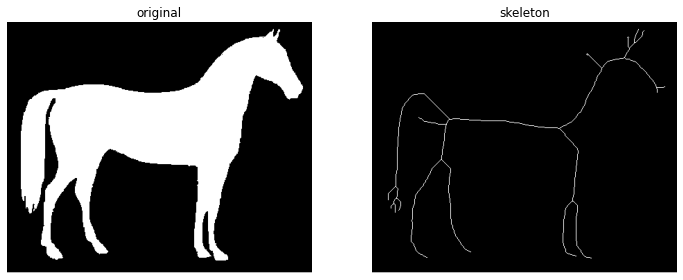

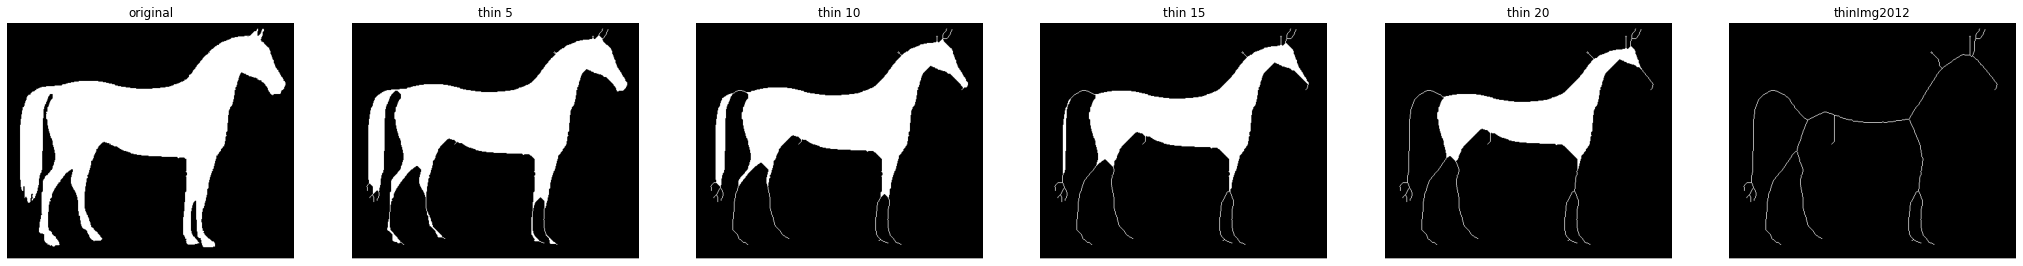

In [20]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
img = rgb2gray(io.imread('img/horse.jpg'))
binaryImg = img > 0.9
#binaryImg = img > 0.5
show_images([img,binaryImg])
skeletonImg = skeletonize(binaryImg)
show_images([binaryImg,skeletonImg],["original","skeleton"])
thinImg5 = thin(binaryImg,5)
thinImg10 = thin(binaryImg,10)
thinImg15 = thin(binaryImg,15)
thinImg20 = thin(binaryImg,20)
thinImg2012 = thin(binaryImg,200000)
show_images([binaryImg,thinImg5,thinImg10,thinImg15,thinImg20,thinImg2012],["original","thin 5","thin 10","thin 15","thin 20","thinImg2012"])

In [ ]:
show_images([])